In [4]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib as plt
import joblib

In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)


In [23]:
model = LinearSVC(C= 0.1, dual=False, random_state = 10, max_iter=5000)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [24]:
model.fit(X_train_scaled, y_train.values.ravel())

LinearSVC(C=0.1, dual=False, max_iter=5000, random_state=10)

In [25]:
val_accuracy = model.score(X_val_scaled, y_val)
print(val_accuracy)

0.7987589965346681


In [26]:
test_accuracy = model.score(X_test_scaled, y_test)
print(test_accuracy)

0.7961259940468257


In [27]:
actual_y = y_test.values.ravel()
pred_y = model.predict(X_test_scaled)

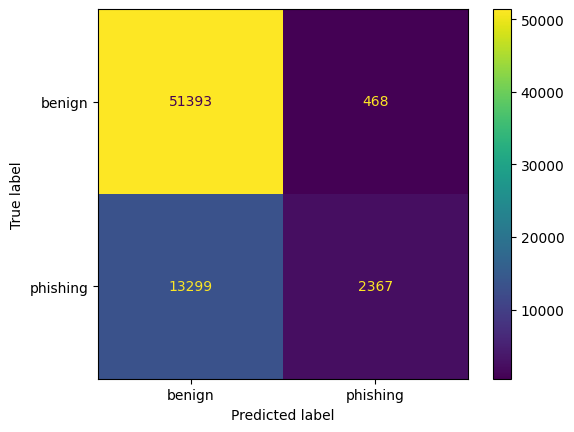

In [28]:
confusion_matrix = metrics.confusion_matrix(actual_y, pred_y)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [29]:
Accuracy = metrics.accuracy_score(actual_y, pred_y)
Precision = metrics.precision_score(actual_y, pred_y)
Recall = metrics.recall_score(actual_y, pred_y)
F1_score = metrics.f1_score(actual_y, pred_y)

In [30]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.7961259940468257, 'Precision': 0.834920634920635, 'Recall': 0.15109153581003448, 'F1_score': 0.2558780606453705}


In [31]:
df = pd.DataFrame({"Model": "LinearSVC", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [32]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.796126,0.834921,0.151092,0.255878


In [33]:
df.to_csv("../Metrics of Dataset #1.csv",  index=False)

In [34]:
dump(model, 'LinearSVC #1.joblib')

['LinearSVC #1.joblib']